In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

## Data cleaning 

In [2]:
df1 = pd.read_csv('house_price.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
len(df1.location.unique())

1306

## Removing non relavant features for model

In [7]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Removing the string value from the "size" column and creating a new columns only numeric value

In [10]:
df2['bhk']= df2['size'].str.split(' ', expand=True)[0]

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13304 non-null  object 
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2 = df2.drop(['size'],axis=1)

In [14]:
df2['bhk'] = pd.to_numeric(df2['bhk'])

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   price       13320 non-null  float64
 4   bhk         13304 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [16]:
df2.isnull().sum()

location       1
total_sqft     0
bath          73
price          0
bhk           16
dtype: int64

## Replacing the null values in the  columns with it's meadian value

In [17]:
a = df2['bhk'].median()
df2['bhk'].fillna(a, inplace=True)

b=df2['bath'].median()
df2['bath'].fillna(b, inplace= True)

In [18]:
df2.isnull().sum()

location      1
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

## some values in 'total_sqft' column has range such as 1254 - 1893. Those values to be converted to a numeric value for model fitting. In this case, range value to be replace with average of respective ranges in the row.

In [19]:
## for example 
df2.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                   4.0
Name: 30, dtype: object

In [20]:
df2['tq']=df2['total_sqft'].str.split('-', expand = True)[1]

In [21]:
df2['tq1']= df2['total_sqft'].str.split('-',expand =True)[0]

In [22]:
df2.head(2)

,location,total_sqft,bath,price,bhk,tq,tq1
0,Electronic City Phase II,1056,2.0,39.07,2.0,None,1056
1,Chikka Tirupathi,2600,5.0,120.00,4.0,None,2600


## some values in "total_sqft" columns values like '34.46Sq'. Those values to be removed from dataset.

In [23]:
## example
df2.loc[410]

location             Kengeri
total_sqft    34.46Sq. Meter
bath                     1.0
price                   18.5
bhk                      1.0
tq                      None
tq1           34.46Sq. Meter
Name: 410, dtype: object

In [24]:
df2[df2['tq'].isnull()]

,location,total_sqft,bath,price,bhk,tq,tq1
0,Electronic City Phase II,1056,2.0,39.07,2.0,None,1056
1,Chikka Tirupathi,2600,5.0,120.00,4.0,None,2600
2,Uttarahalli,1440,2.0,62.00,3.0,None,1440
3,Lingadheeranahalli,1521,3.0,95.00,3.0,None,1521
4,Kothanur,1200,2.0,51.00,2.0,None,1200
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0,None,3453
13316,Richards Town,3600,5.0,400.00,4.0,None,3600
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0,None,1141
13318,Padmanabhanagar,4689,4.0,488.00,4.0,None,4689


In [25]:
df2.dropna(subset=['location'], inplace=True)
df2.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
tq            13118
tq1               0
dtype: int64

In [26]:
df2.tq= pd.to_numeric(df2.tq)

## converting the 'tq1' column to numeric value in replace other measurements as null

In [27]:
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        return None

df2['tq1'] = df2['tq1'].apply(convert_to_numeric)

In [28]:

df2[df2.tq1.isnull()]


,location,total_sqft,bath,price,bhk,tq,tq1
410,Kengeri,34.46Sq. Meter,1.0,18.50,1.0,NaN,NaN
648,Arekere,4125Perch,9.0,265.00,9.0,NaN,NaN
775,Basavanagara,1000Sq. Meter,2.0,93.00,1.0,NaN,NaN
872,Singapura Village,1100Sq. Yards,2.0,45.00,2.0,NaN,NaN
1019,Marathi Layout,5.31Acres,1.0,110.00,1.0,NaN,NaN
1086,Narasapura,30Acres,2.0,29.50,2.0,NaN,NaN
1400,Chamrajpet,716Sq. Meter,9.0,296.00,9.0,NaN,NaN
1712,Singena Agrahara,1500Sq. Meter,3.0,95.00,3.0,NaN,NaN
1743,Hosa Road,142.61Sq. Meter,3.0,115.00,3.0,NaN,NaN
1821,Sarjapur,1574Sq. Yards,3.0,76.00,3.0,NaN,NaN


In [29]:
df2.dropna(subset=['tq1'],inplace=True)

In [30]:
df2.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
tq            13072
tq1               0
dtype: int64

## Replacing the values in "total_sqft" column with average of 'tq' and 'tq1'.

In [31]:
def convert_range_to_avg(sqft_range):
    sqft_values = [float(value) for value in sqft_range.split('-')]
    return sum(sqft_values) / len(sqft_values)

df2['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_range_to_avg(x) if '-' in x else float(x))




In [32]:
## the value, which was a range, now replaced with average of the range.
df2.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                 4.0
tq               2850.0
tq1              2100.0
Name: 30, dtype: object

In [33]:
## now 'tq' and 'tq1' columns are not needed now
df3= df2.drop(['tq','tq1'],axis=1) 

In [34]:
df3.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0


In [35]:
location_count= df3.groupby('location')['location'].count().sort_values(ascending= False)

There are over 1200 unique values for 'location'. If we apply dummy coding, then we will be having more than 1300 features for modelling which is not ideal for modeling. Therefore, we are going to group all location, which occur less than times in the dataset as 'Other'


In [36]:
location_count

location
Whitefield             538
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         271
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1299, dtype: int64

In [37]:



threshold = 10

# Count the occurrences of each location
location_count = df3.groupby('location')['location'].count().sort_values(ascending=False)

# Find locations that appear less than the threshold
locations_to_replace = location_count[location_count < threshold].index

# Replace those locations with 'Other'
df3['location'] = df3['location'].apply(lambda x: 'Other' if x in locations_to_replace else x)




In [38]:
df3.groupby('location')['location'].count().sort_values(ascending= False)

location
Other               2761
Whitefield           538
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       271
                    ... 
Kalkere               10
Gunjur Palya          10
Ganga Nagar           10
Sadashiva Nagar       10
Dodsworth Layout      10
Name: location, Length: 254, dtype: int64

In [39]:
len(df3.location.unique())

254

## Removing the outliers 

In [40]:
def plot_scatter(df,location):
    bhk2= df[(df.location == location) & (df.bhk ==2)]
    bhk3= df[(df.location== location) & (df.bhk==3 )]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2bhk')
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3bhk', marker= '+')
    plt.xlabel('Total square feet')
    plt.ylabel('Price')
    plt.legend()
    

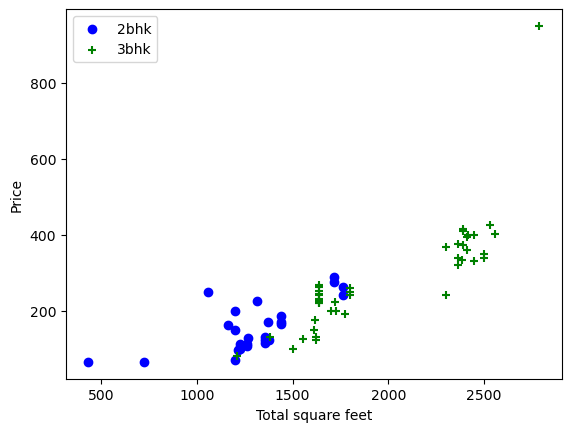

In [41]:
plot_scatter(df3, 'Rajaji Nagar')

total_sqft       Axes(0.125,0.11;0.227941x0.77)
bath          Axes(0.398529,0.11;0.227941x0.77)
bhk           Axes(0.672059,0.11;0.227941x0.77)
dtype: object

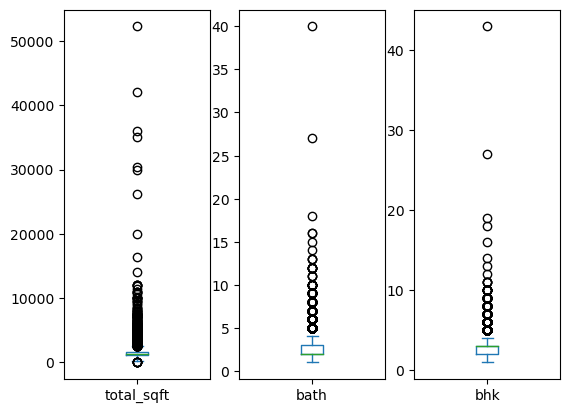

In [42]:
df3[['total_sqft', 'bath', 'bhk']].plot(kind='box', subplots= True)

In [43]:
## removing the datapoints where no of bath are higher than  'no of bedrooms + 2'
df3[df3.bath>df3.bhk+2]

,location,total_sqft,bath,price,bhk
1078,BTM 1st Stage,3300.0,14.0,500.0,9.0
1953,KR Puram,1200.0,12.0,110.0,8.0
1979,Other,990.0,12.0,120.0,8.0
2620,Other,11338.0,9.0,1000.0,6.0
6838,Rajaji Nagar,7500.0,8.0,1700.0,5.0
6937,5th Block Hbr Layout,2600.0,12.0,675.0,9.0
7709,Chikkabanavar,2460.0,7.0,80.0,4.0
8106,Other,1850.0,12.0,300.0,8.0
9974,Other,2400.0,6.0,775.0,3.0
9990,Other,1200.0,9.0,122.0,6.0


In [44]:
df4= df3[df3.bath<df3.bhk+2]

In [45]:
df4.shape

(13099, 5)

In [46]:
## calculating mean + 3SD for 'bhk'
a = df4.bhk.mean() + 3*(df4.bhk.std())

In [47]:
## calculating mean + 3sd for 'total_sqft'
b = df4.total_sqft.mean() + 3* (df4.total_sqft.std())

In [48]:
df5= df4[df4.total_sqft<b]

In [49]:
df5= df5[df5.bhk<a]

In [50]:
##  'mean - 3SD' is a negative value, therefore used 'Q2 - IQR' to remove outliers at lower level.
c = df5.total_sqft.quantile(0.25) -(df5.total_sqft.quantile(.75) - df5.total_sqft.quantile(0.25))
c

555.0

In [51]:

df5=df5[df5.total_sqft>c]

In [52]:
df5.shape

(12519, 5)

total_sqft       Axes(0.125,0.11;0.168478x0.77)
bath          Axes(0.327174,0.11;0.168478x0.77)
price         Axes(0.529348,0.11;0.168478x0.77)
bhk           Axes(0.731522,0.11;0.168478x0.77)
dtype: object

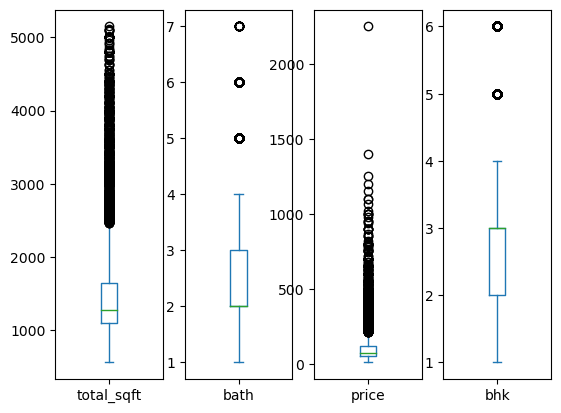

In [53]:
df5.plot(kind='box', subplots=True)

<function matplotlib.pyplot.show(close=None, block=None)>

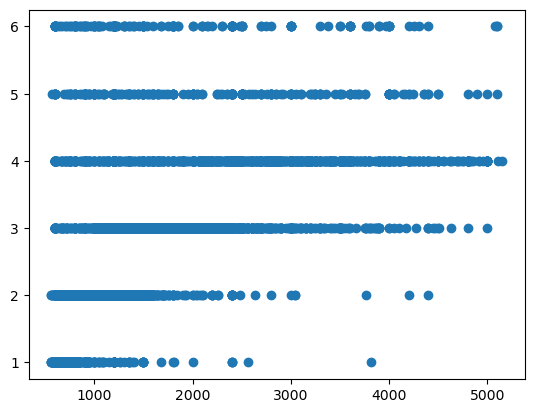

In [54]:
plt.scatter(df5.total_sqft, df5.bhk)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

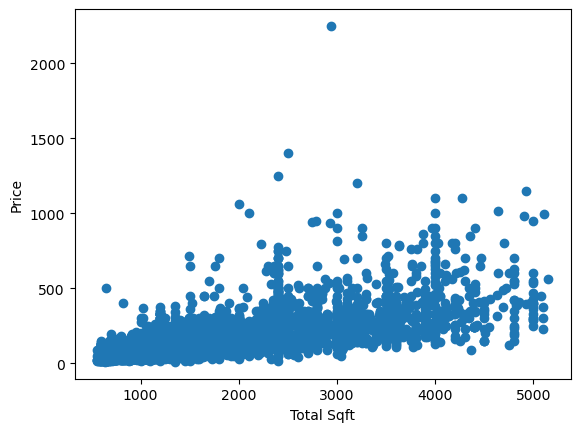

In [55]:
plt.scatter(df5.total_sqft, df5.price)
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show

In [56]:
p25= df5.price.quantile(0.25)
p75= df5.price.quantile(0.75)
iqr= p75-p25
l = p25 - iqr
h =p75 +iqr
df6=df5[df5.price < h]


In [57]:
l

-14.5

In [58]:
df6.shape

(11031, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

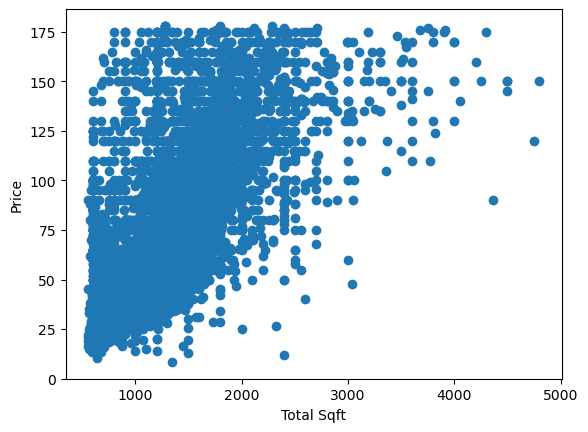

In [59]:
## after removed outliers 
plt.scatter(df6.total_sqft, df6.price)
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show

In [60]:
df5.describe()

,total_sqft,bath,price,bhk
count,12519.000000,12519.000000,12519.000000,12519.000000
mean,1485.663714,2.554597,102.544296,2.689113
std,676.665382,0.946248,101.979318,0.913062
min,560.000000,1.000000,8.440000,1.000000
25%,1104.000000,2.000000,50.000000,2.000000
50%,1277.000000,2.000000,70.000000,3.000000
75%,1650.000000,3.000000,114.500000,3.000000
max,5150.000000,7.000000,2250.000000,6.000000


In [61]:
df6.describe()

,total_sqft,bath,price,bhk
count,11031.000000,11031.000000,11031.000000,11031.000000
mean,1328.703407,2.387816,73.697402,2.542381
std,426.563684,0.799984,34.639814,0.810959
min,560.000000,1.000000,8.440000,1.000000
25%,1085.500000,2.000000,48.000000,2.000000
50%,1235.000000,2.000000,65.000000,2.000000
75%,1515.000000,3.000000,92.000000,3.000000
max,4800.000000,7.000000,178.000000,6.000000


<function matplotlib.pyplot.show(close=None, block=None)>

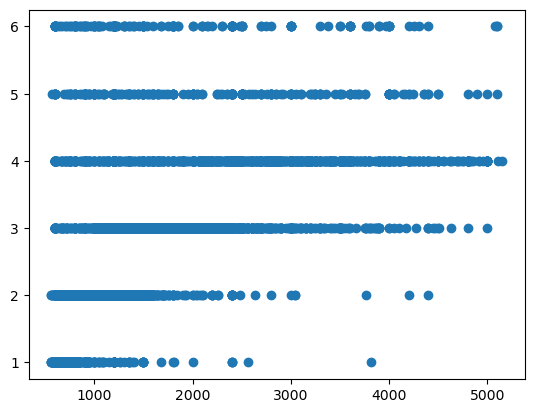

In [62]:
plt.scatter(df5.total_sqft, df5.bhk)
plt.show

In [63]:
df5.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_33048\2952672672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.corr()


,total_sqft,bath,price,bhk
total_sqft,1.000000,0.596978,0.709178,0.553111
bath,0.596978,1.000000,0.542317,0.852169
price,0.709178,0.542317,1.000000,0.505378
bhk,0.553111,0.852169,0.505378,1.000000


In [64]:
df6.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_33048\2505764688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.corr()


,total_sqft,bath,price,bhk
total_sqft,1.000000,0.537961,0.635206,0.519209
bath,0.537961,1.000000,0.581319,0.831595
price,0.635206,0.581319,1.000000,0.542021
bhk,0.519209,0.831595,0.542021,1.000000


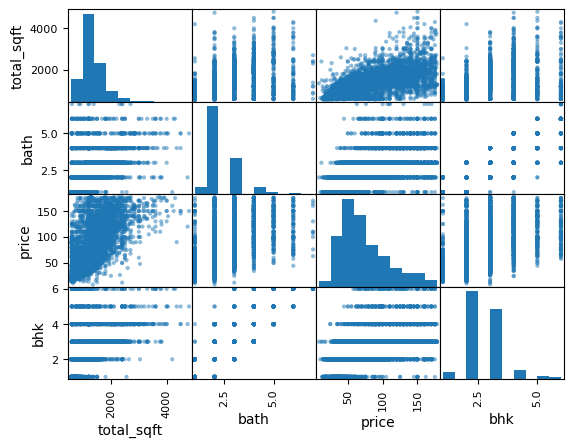

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(df6)
plt.show()

In [66]:
df6.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0


In [67]:
df6.reset_index()

,index,location,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,2,Uttarahalli,1440.0,2.0,62.00,3.0
3,3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
11026,13310,Rachenahalli,1050.0,2.0,52.71,2.0
11027,13312,Bellandur,1262.0,2.0,47.00,2.0
11028,13313,Uttarahalli,1345.0,2.0,57.00,3.0
11029,13314,Green Glen Layout,1715.0,3.0,112.00,3.0


## Dummy coding of categorical veriable 

In [68]:
df7 = pd.get_dummies(df6.location)
df7.drop(columns=['Other'], axis=1)
df7

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df8 = df6.drop('location', axis=1)

In [70]:
housing = pd.concat([df7,df8], axis=1)

In [71]:
housing.shape

(11031, 255)

In [72]:
x = housing.drop('price',axis=1)

In [73]:
y= housing.price

In [74]:
model= LinearRegression()
model_1= Lasso()
model_2= DecisionTreeRegressor()

In [75]:
avg_r2_linear =cross_val_score(model,x,y, cv=5).mean()
avg_r2_linear

0.5893798978169279

In [76]:
avg_r2_lasso= cross_val_score(model_1,x,y, cv=5).mean()
avg_r2_lasso

0.4834290369487614

In [77]:
avg_r2_tree= cross_val_score(model_2,x,y, cv=5).mean()
avg_r2_tree

0.5128871192253092

In [78]:
from sklearn.metrics import mean_squared_error

mse_linear = -cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_linear = np.mean(mse_linear)

mse_lasso = -cross_val_score(model_1, x, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_lasso = np.mean(mse_lasso)

mse_tree = -cross_val_score(model_2, x, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_tree = np.mean(mse_tree)

print("Mean Squared Error (Linear Regression):", mean_mse_linear)
print("Mean Squared Error (Lasso Regression):", mean_mse_lasso)
print("Mean Squared Error (Decision Tree Regressor):", mean_mse_tree)


Mean Squared Error (Linear Regression): 492.40291020897246
Mean Squared Error (Lasso Regression): 619.5812662151203
Mean Squared Error (Decision Tree Regressor): 585.6936779978806


## LinearRegression gives the best score